<a href="https://colab.research.google.com/github/mohabxxx/Medical-insurance-cost-prediction/blob/main/Medical_Insurance_Cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('insurance.csv')
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
df.age.mean()

39.20702541106129

In [ ]:
df.bmi.mean()

30.66339686098655

In [ ]:
df.children.mean()

1.0949177877429

In [ ]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X[:,1]=le.fit_transform(X[:, 1])

In [ ]:
le=LabelEncoder()
X[:,4]=le.fit_transform(X[:, 4])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[0.0 0.0 0.0 ... 27.9 0 1]
 [0.0 0.0 1.0 ... 33.77 1 0]
 [0.0 0.0 1.0 ... 33.0 3 0]
 ...
 [0.0 0.0 1.0 ... 36.85 0 0]
 [0.0 0.0 0.0 ... 25.8 0 0]
 [0.0 1.0 0.0 ... 29.07 0 1]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
ann=tf.keras.models.Sequential()


In [ ]:
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='relu'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'mae', metrics = ['mae'],)

In [ ]:
history=ann.fit(X_train, y_train, epochs = 300)

Epoch 1/300
34/34 [==============================] - 1s 2ms/step - loss: 13200.2012 - mae: 13200.2012
Epoch 2/300
34/34 [==============================] - 0s 2ms/step - loss: 13197.6387 - mae: 13197.6387
Epoch 3/300
34/34 [==============================] - 0s 2ms/step - loss: 13193.1143 - mae: 13193.1143
Epoch 4/300
34/34 [==============================] - 0s 2ms/step - loss: 13185.3330 - mae: 13185.3330
Epoch 5/300
34/34 [==============================] - 0s 2ms/step - loss: 13172.7725 - mae: 13172.7725
Epoch 6/300
34/34 [==============================] - 0s 2ms/step - loss: 13153.8467 - mae: 13153.8467
Epoch 7/300
34/34 [==============================] - 0s 2ms/step - loss: 13126.7686 - mae: 13126.7686
Epoch 8/300
34/34 [==============================] - 0s 2ms/step - loss: 13089.7979 - mae: 13089.7979
Epoch 9/300
34/34 [==============================] - 0s 2ms/step - loss: 13041.1797 - mae: 13041.1797
Epoch 10/300
34/34 [==============================] - 0s 2ms/step - loss: 12979.42

In [ ]:
ann.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 100)               1000      
                                                                 
 dense_40 (Dense)            (None, 10)                1010      
                                                                 
 dense_41 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2021 (7.89 KB)
Trainable params: 2021 (7.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
ann.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 2398.5007 - mae: 2398.5007


[2398.500732421875, 2398.500732421875]

In [ ]:
np.mean(y_test) , np.median(y_test)

(13546.866383690298, 9195.2231)

Text(0.5, 0, 'epochs')

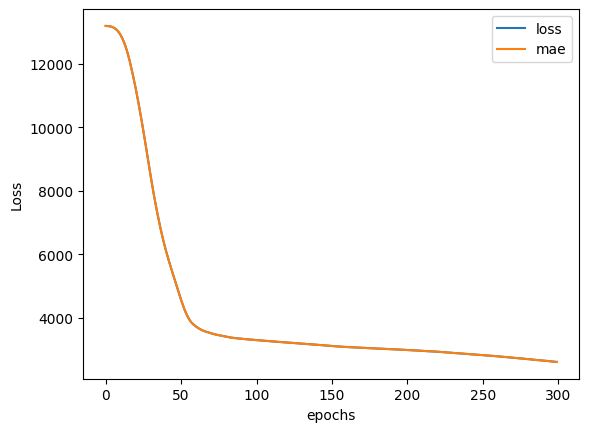

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel('Loss')
plt.xlabel('epochs')